In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
from cycler import cycler

# -- Figure size --
rcParams['figure.figsize'] = (12, 4)
# -- Saving Options --
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 500
rcParams['savefig.transparent'] = True
# -- Plot Styles --
rcParams['lines.linewidth'] = 0.3
teal = (106 / 256, 197 / 256, 179 / 256)
navy = (56 / 256, 74 / 256, 143 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])

In [3]:
from tqdm.notebook import tqdm

In [4]:
import nltk

In [8]:
df = pd.read_csv('subtaskB_train.csv').drop(columns=['Id', 'conspiracy'])

In [9]:
df.head()

,comment_text,topic
0,"Siamo davanti ad una prova, e non solo di quoz...",Qanon
1,La storia dei 2 bimbi di Bergamo - vaccini: qu...,Covid
2,L'avete capito che non toglieranno il green pa...,Covid
3,Quindi la farsa dello spazio e della terra a ...,Terra Piatta
4,"In breve tempo, per accedere a Internet, sarà ...",Qanon


In [10]:
df.shape

(810, 2)

In [11]:
found=0
for e in list(df.columns):
    if df[e].isna().any():
        found+=1
        print(e, df[e].isna().sum())
if found==0:
  print('No NaN values found')


No NaN values found


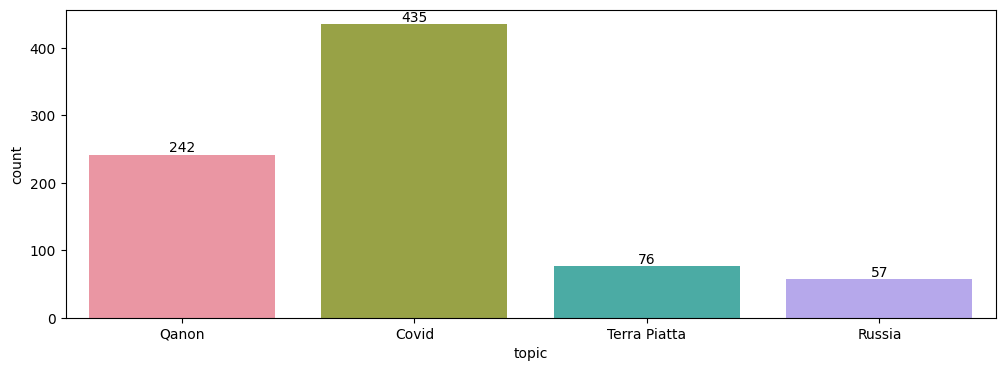

In [12]:
ax = sns.countplot(data=df, x='topic')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## NLTK preprocessing

### distribuzione parole

In [13]:
import re
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
punteggiatura = ['.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$', '[', ']', '``', '_', "''", '*', '...', "’"]

In [17]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

def clean_text(text, lower=False):
    """ text: a string
        return: modified initial string """
    if lower:
      text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing.
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['comment_text'] = df['comment_text'].apply(clean_text)

In [18]:
df.head(10)

,comment_text,topic
0,Siamo davanti prova solo quoziente intellettiv...,Qanon
1,La storia 2 bimbi Bergamo - vaccini: qusto gio...,Covid
2,L'avete capito toglieranno green pass anzi fin...,Covid
3,Quindi farsa spazio terra pallone continua fin...,Terra Piatta
4,In breve tempo accedere Internet richiesto doc...,Qanon
5,Quelle sembrano buone iniziative spesso finisc...,Covid
6,Se sembra pianeta influenza congenio alieno ch...,Terra Piatta
7,DA BRIAN CATES Dall'analisi dell'intelligence ...,Qanon
8,🔴🔴 VACCINI COVID: PIÙ RISCHI NEI GUARITI Gli s...,Covid
9,❗️**i leccaculo Carlo De Benedetti arrivano mi...,Qanon


In [22]:
tokens = list()

for row in df.comment_text:
    tokens_sent = nltk.word_tokenize(row)
    for token in tokens_sent:
      if not token.isnumeric() and token not in punteggiatura:
        tokens.append(token)

    #tokens += tokens_sent

print('tokens:', len(tokens),
      '\nvocabulary:', len(set(tokens)),
      '\nTTR:', len(set(tokens))/len(tokens))

tokens: 34756 
vocabulary: 12143 
TTR: 0.34937852457129703


In [23]:
tokens[:50]

['Siamo',
 'davanti',
 'prova',
 'solo',
 'quoziente',
 'intellettivo',
 'spirituale',
 'Qui',
 'l',
 'intelligenza',
 'c',
 'entra',
 'questione',
 'apertura',
 'mentale',
 'aver',
 'coraggio',
 'mettere',
 'discussione',
 'sistema',
 'crearsi',
 'propria',
 'opinione',
 'soli',
 'ognuno',
 'proprie',
 'ricerche',
 'fidandosi',
 'proprio',
 'istinto',
 'proprie',
 'sensazioni',
 'usando',
 'discernimento',
 'senza',
 'bersi',
 'priori',
 'sistema',
 'vende',
 'ogni',
 'giorno',
 'Vuol',
 'dire',
 'rimettere',
 'gioco',
 'passato',
 'istruzione',
 'credenze',
 'All',
 'inizio']

In [24]:
words, freqs = np.unique(tokens, return_counts=True)[0], np.unique(tokens, return_counts=True)[1]

sorted_freqs = sorted(zip(freqs, words), reverse=True)
sorted_frequencies, sorted_words = zip(*sorted_freqs)

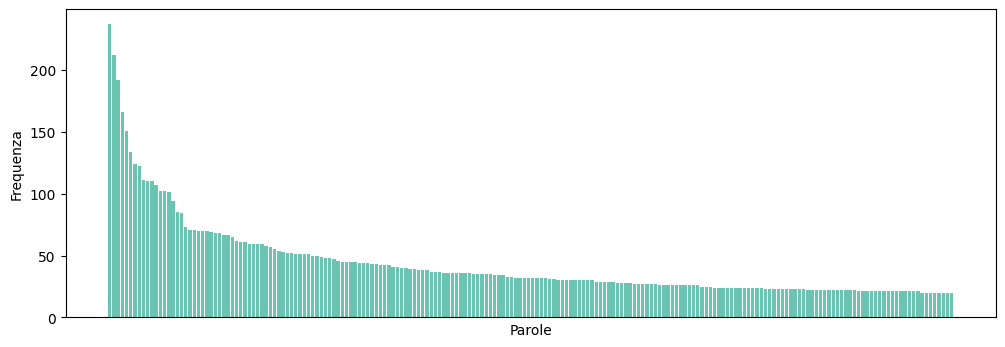

In [25]:
plt.bar(sorted_words[:200], sorted_frequencies[:200])
plt.xlabel('Parole')
plt.ylabel('Frequenza')

plt.xticks([])

#plt.savefig('zipf.pdf', dpi=300, bbox_inches='tight')
plt.show()

### distribuzione POS

In [26]:
#punteggiatura = ('.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$')
aggettivi = ('JJ', 'JJR', 'JJS')
sostantivi = ('NN', 'NNS', 'NNP', 'NNPS')
verbi = ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'MD')
avverbi = ('RB', 'RBR', 'RBS', 'WRB')
articoli = ('DT',)
preposizioni = ('IN', 'RP')
congiunzioni = ('CC', 'IN')
pronomi = ('PRP', 'PRPS', 'WP', 'WPS')

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
tok_pos = nltk.pos_tag(tokens) #(token, POS)

pos = list() #pos only
for tok, p in tok_pos:
    if p not in punteggiatura:
        pos.append(p)


In [29]:
pos_count= list()
for p, count in zip(np.unique(pos, return_counts=True)[0], np.unique(pos, return_counts=True)[1]):
    pos_count.append((count,p))

sorted(pos_count, reverse=True)[:10]

[(18974, 'NN'),
 (8435, 'NNP'),
 (3151, 'JJ'),
 (688, 'RB'),
 (625, 'VBZ'),
 (538, 'IN'),
 (525, 'FW'),
 (483, 'VBP'),
 (277, 'VBD'),
 (259, 'NNS')]

In [30]:
def mergePOS(pos_lst, pos_counts, pos_dict, pos_key):
    for count, pos in pos_counts:
        if pos in pos_lst:
            pos_dict[pos_key]= pos_dict.get(pos_key) + count

In [31]:
pos_grouped = {
    'aggettivi':0,
    'sostantivi':0,
    'verbi':0,
    'avverbi':0,
    'articoli':0,
    'preposizioni':0,
    'congiunzioni':0
}

mergePOS(aggettivi, pos_count, pos_grouped, 'aggettivi')
mergePOS(sostantivi, pos_count, pos_grouped, 'sostantivi')
mergePOS(verbi, pos_count, pos_grouped, 'avverbi')
mergePOS(avverbi, pos_count, pos_grouped, 'verbi')
mergePOS(articoli, pos_count, pos_grouped, 'articoli')
mergePOS(preposizioni, pos_count, pos_grouped, 'preposizioni')
mergePOS(congiunzioni, pos_count, pos_grouped, 'congiunzioni')

In [32]:
pos_grouped

{'aggettivi': 3157,
 'sostantivi': 27668,
 'verbi': 695,
 'avverbi': 1542,
 'articoli': 89,
 'preposizioni': 540,
 'congiunzioni': 573}

In [33]:
sorted_pos = {k: v for k, v in sorted(pos_grouped.items(), key=lambda item: item[1], reverse=True)}

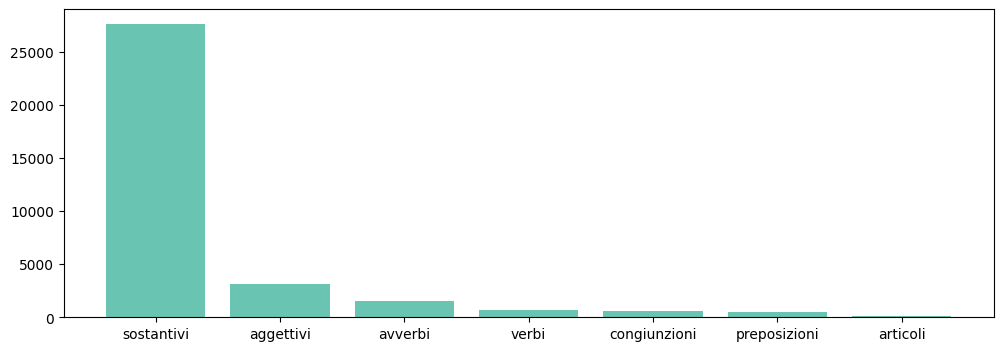

In [34]:
plt.bar(sorted_pos.keys(), sorted_pos.values())

#plt.xticks(rotation=45)
plt.show()

In [35]:
pos_grouped['verbi']/pos_grouped['sostantivi']

0.025119271360416365

### NE

In [36]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [37]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [38]:
def extract_NE(tok_pos, NE):
  NEs = list()
  freq_NEs = list()

  # si ottiene l'albero, quindi si controlla che ci siano nodi intermedi etichettati
  # con una data NE
  ent_nom = nltk.ne_chunk(tok_pos)
  for nodo in ent_nom:
      name_ent = ''
      if hasattr(nodo, 'label'):
          if nodo.label() == NE:
              for figlio in nodo.leaves():
                  # si prende il primo elemento di ogni foglia, corrispondente al token,
                  # quindi si aggiunge la stringa ad una lista
                  name_ent += ' ' + figlio[0]
              NEs.append(name_ent)

  for ne in list(set(NEs)):
      freq = NEs.count(ne)
      freq_NEs.append((freq, ne))
  freq_NEs = sorted(freq_NEs, reverse=True)

  return freq_NEs

In [39]:
freq_persone = extract_NE(tok_pos, 'PERSON')

In [40]:
freq_persone[:15]

[(59, ' Non'),
 (27, ' Trump'),
 (22, ' Questo'),
 (19, ' Sono'),
 (17, ' Per'),
 (15, ' Putin'),
 (14, ' Questa'),
 (14, ' Ecco'),
 (14, ' Covid'),
 (13, ' Draghi'),
 (12, ' Biden'),
 (11, ' Siamo'),
 (11, ' Clinton'),
 (10, ' Tutti'),
 (10, ' Pfizer')]

In [41]:
STOPWORDS = set(stopwords.words('italian'))
' Non'.split()[0].lower() in STOPWORDS

True

In [42]:
persone_dict = dict()
threshold = 1
threshold_token = 3

for count, token in freq_persone:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    persone_dict[token] = count

In [43]:
freq_gpe = extract_NE(tok_pos, 'GPE')


In [44]:
freq_gpe[:15]

[(51, ' Russia'),
 (26, ' Italia'),
 (14, ' Ucraina'),
 (9, ' Paese'),
 (7, ' Germania'),
 (6, ' Washington'),
 (6, ' Chi'),
 (5, ' America'),
 (3, ' Roma'),
 (3, ' New York'),
 (3, ' Melania'),
 (3, ' La'),
 (3, ' Israele'),
 (3, ' Frajese'),
 (3, ' British')]

In [45]:
gpe_dict = dict()
threshold = 1
threshold_token = 2

for count, token in freq_gpe:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    gpe_dict[token] = count

## wordcloud

In [46]:
from wordcloud import WordCloud, ImageColorGenerator

In [47]:
persone_merged = list()
for token in list(persone_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = persone_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  persone_merged += (token.split())

In [48]:
import random

text = ''
random.shuffle(persone_merged)
for token in persone_merged:
  text += token + ' '
text

"Safire Steele Blaylock State Kellen Google Savile Recarey Alcuni Trump Trump Costa È Malone Detto Per Coop State Italia Ieri Il Aspetto Draghi Clinton Biolab BIDEN Camera Governi George Putin Arcoiris Demonstration Grande Andrea Schwab Tutte Nobel Repubblica Russia Uniti Italia Leyen Vladimir Deep Patel Latina Russia Latina Super Monkeypox Chi Saper Trump Australia Lucia Nel Londra Solo NO Davos Giudice Ucraina Elon FEST Nel Ravenna Europe A Ma Biden Durante Biden Rothschild Zelensky Ordine Moderna Marta Paesi Uniti Framework America Buio Pfizer Marines Bill Legge Lanciare Karl Di Differen Trump Dedonno Olaf Rockefeller Draghi Ecco Biolabs Solo Omicron Allunaggio Unito Appello Edward Epstein Ucraina Deep Finora BA Italia Morto Alessandra Corte La È Elon Ricercatori Spike Affari Donbas Mariupol Tech Sussmann Bologna Domani Notizia Stato Gates Antony Jerome Cosa Sussmann Tutto Durham Fisica Mantova Clinton Unito Clinton Trudeau Ecco Europa Iosefina Meloni Donald Il Wave Sempre Fubini Ar

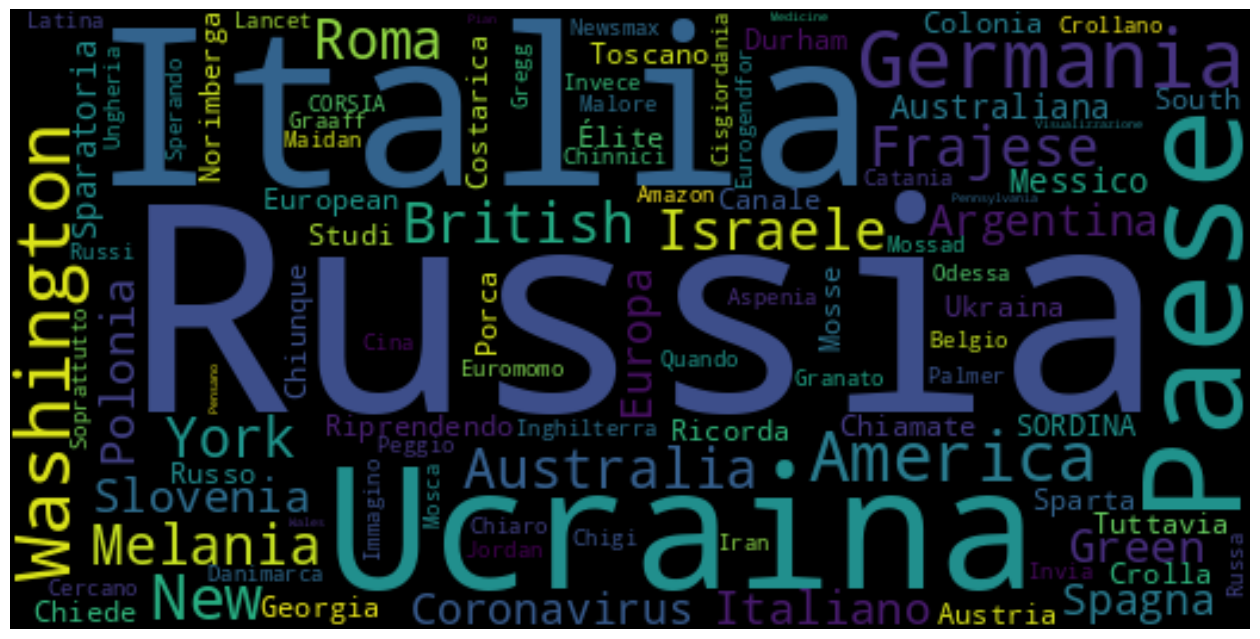

In [74]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('person_wc.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
gpe_merged = list()
for token in list(gpe_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = gpe_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  gpe_merged += (token.split())

In [51]:
text = ''
random.shuffle(gpe_merged)
for token in gpe_merged:
  text += token + ' '
text

'Polonia Italia Italia Russia British Russia Italia Italia Australiana Sparatoria Italia Messico Russia York New York Riprendendo Ucraina Slovenia Russia Washington Germania Durham Germania Italia Ukraina Green Russia Russia Élite Germania Green Australia Russia Crolla Canale Paese Studi Russia Washington Russia Sparta Italiano Georgia Russia Russia Russia Russia Russia Ucraina Russia European Austria SORDINA Toscano Ricorda Paese Italia Russia Russia Russia Chiede Russia Tuttavia Roma Porca Russia Washington Australia Costarica Colonia Slovenia Ucraina Norimberga Mosse Chiamate South Russo Chiunque Italia Washington Washington Ucraina Russia Russia Russia Melania Inghilterra Ucraina Ucraina Cisgiordania New Ucraina British Russia Russa America CORSIA Italia Odessa Russia Roma Mosca Italia Italia Russia Italia Peggio America Chigi Crollano Italia Russia Granato Russia Italia Russia York Jordan Ucraina Russia Italia Russia Newsmax Russia Latina Ucraina Iran Italia Graaff Italia Euromomo

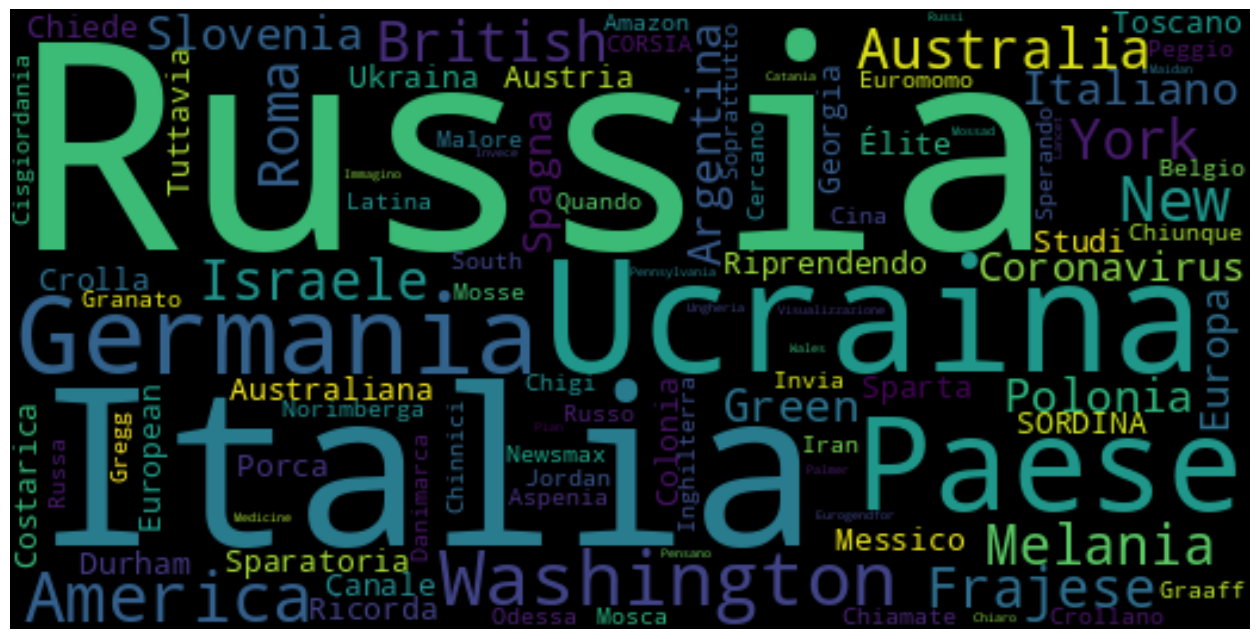

In [71]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.savefig('gpe_wc.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Sentiment analysis

In [53]:
!pip uninstall vaderSentiment
!pip install vader-multi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 2.9 MB/s eta 0:00:00


VADER è un lexicon pensato solo per l'inglese

vader-multi effettua una traduzione della frase in inglese tramite Google Translate API e puoi effettua la SA tramite la libreria "Vader" in inglese.

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("VADER is smart, handsome, and funny.")

{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}

In [55]:
analyzer.polarity_scores("VADER è MOLTO INTELLIGENTE, bello e DIVERTENTE!!!")

{'neg': 0.0, 'neu': 0.224, 'pos': 0.776, 'compound': 0.9417}

In [56]:
print(df['comment_text'][3])
analyzer.polarity_scores(df['comment_text'][3])

Quindi farsa spazio terra pallone continua finti viaggi lunari marziani.. motivo vengono finanziati migliardi d idollari.. poco costo.. dato lanciano razzo poi e' destinato cadere nell'oceano.. atterrare solo base.. gente poi casca dato dopo aver visto lancio reale poi assiste film fatto studio stesso sfornano film Marvel.. reata' virtuale possono fare cio' vogliono!!


{'neg': 0.096, 'neu': 0.846, 'pos': 0.059, 'compound': -0.554}

In [59]:
df_vader = pd.DataFrame(columns=['text', 'neg', 'neu', 'pos','compound', 'topic'])

In [61]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    df_vader.loc[i, 'text'] = row['comment_text']
    df_vader.loc[i, 'conspiratorial'] = row['topic']
    try:
      score = analyzer.polarity_scores(row['comment_text'])
      for key in score.keys():
          df_vader.loc[i, key] = score[key]
    except IndexError:
      continue
    df_vader.loc[i, 'conspiratorial'] = row['topic']

df_vader.head()

  0%|          | 0/810 [00:00<?, ?it/s]

,text,neg,neu,pos,compound,topic,conspiratorial
0,Siamo davanti prova solo quoziente intellettiv...,0.058,0.715,0.227,0.959,NaN,Qanon
1,La storia 2 bimbi Bergamo - vaccini: qusto gio...,0.107,0.893,0.0,-0.2023,NaN,Covid
2,L'avete capito toglieranno green pass anzi fin...,0.06,0.94,0.0,-0.1027,NaN,Covid
3,Quindi farsa spazio terra pallone continua fin...,0.096,0.846,0.059,-0.554,NaN,Terra Piatta
4,In breve tempo accedere Internet richiesto doc...,0.0,1.0,0.0,0.0,NaN,Qanon


In [62]:
df_vader.shape

(810, 7)

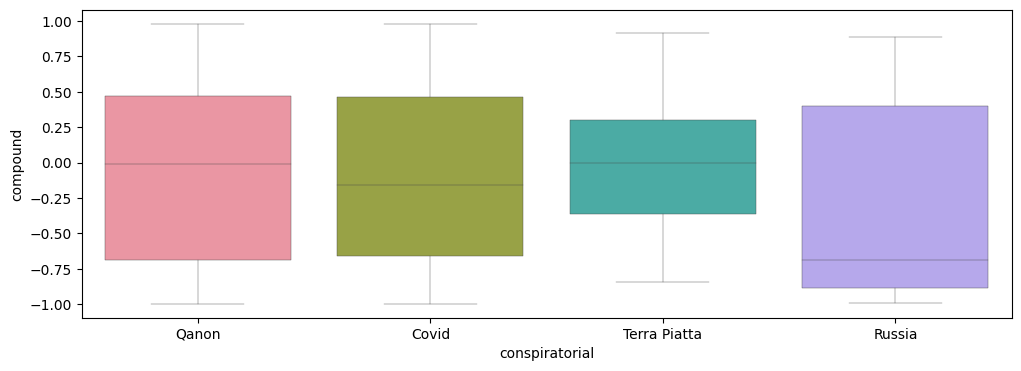

In [63]:
sns.boxplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

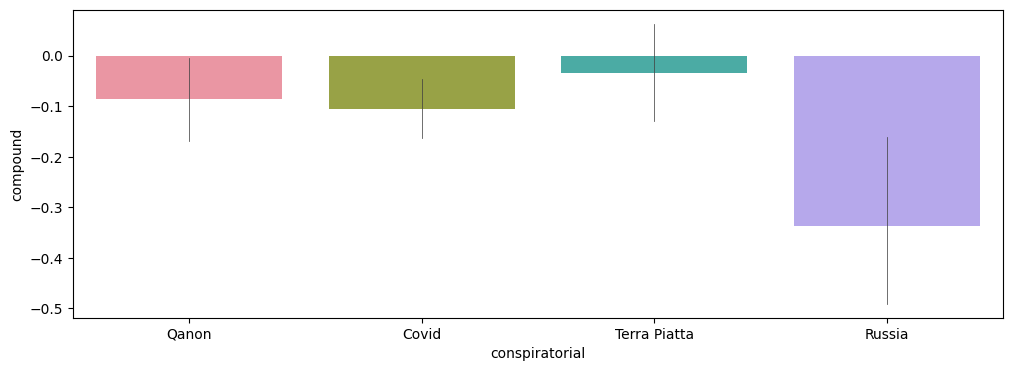

In [64]:
sns.barplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

i post cospirazionisti tendono ad avere una sentiment più negativa

In [65]:
df_vader.columns[1:4]

Index(['neg', 'neu', 'pos'], dtype='object')

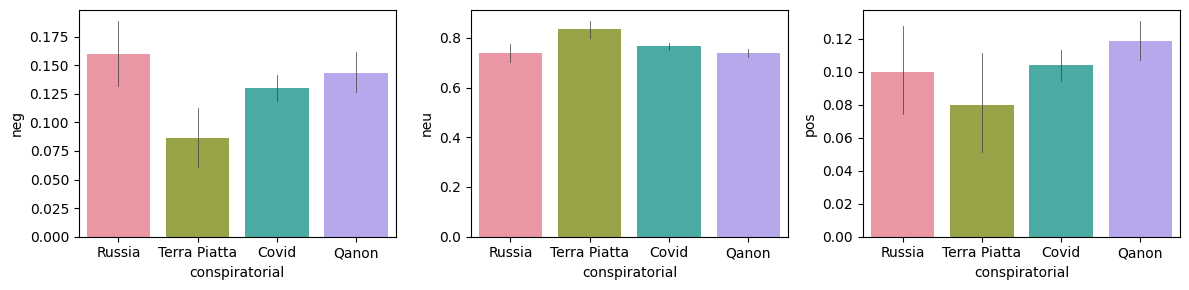

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(df_vader.columns[1:4]):
    sns.barplot(data=df_vader, x='conspiratorial', y=col,
                order=list(reversed(df_vader.conspiratorial.unique())), ax=axs[i])

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

notare la scala dei dati, il sentimento negativo è comunque minimo e non va mai oltre lo 0.12

In [72]:
df_vader['compound'].mean(), df_vader['compound'].std()

(-0.10913481481481484, 0.6117505402397184)

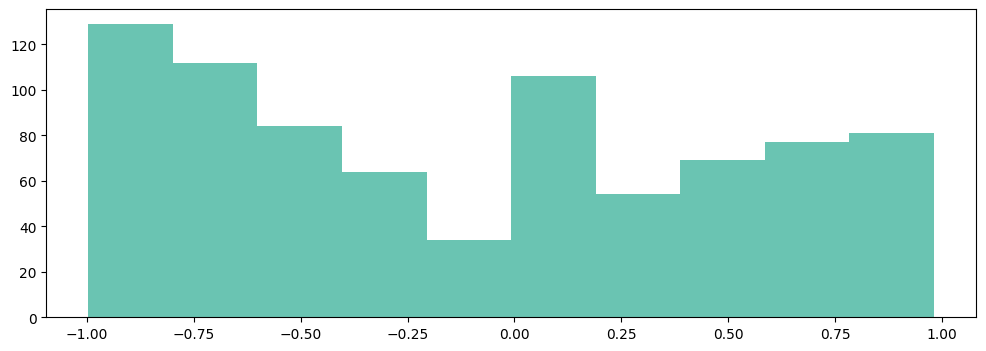

In [73]:
plt.hist(df_vader['compound'])
plt.show()

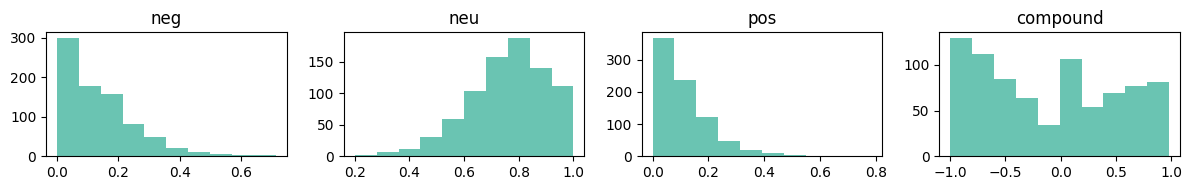

In [69]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))

for i, col in enumerate(df_vader.columns[1:5]):
  ax=axs[i]
  ax.hist(df_vader[col])
  ax.set_title(col)

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()